In [131]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import datetime
from pandas.plotting import scatter_matrix

from app import Bank
import app.utils

In [133]:
bank = Bank('DKB')
print(f'Bank: {bank.name}')

Bank: DKB


## Accounts

In [134]:
bank.accounts

,id,firstname,lastname,balance


## Transactions

In [135]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp


## Open Accounts

In [136]:
bank.open_account(account_id=1, firstname='Dalia', lastname='Das')
bank.open_account(account_id=2, firstname='Matthias', lastname='Rettenmeier')
bank.open_account(account_id=3, firstname='Manuel', lastname='Wiedenmann')

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


## Add transactions

In [137]:
bank.add_transaction(transaction_id=0,
                     sender_id=1,
                     recipient_id=2,
                     subject='Mein Weltbild',
                     amount=100.0,
                     category='Bücher',
                     timestamp=datetime.datetime.utcnow())

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495


In [138]:
transactions = [
    {'transaction_id': 1,
     'sender_id': 1,
     'recipient_id': 2,
     'subject': 'Data Science für Dummies',
     'amount': 26.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 2,
     'sender_id': 1,
     'recipient_id': 3,
     'subject': 'Python programmieren lernen für Dummies',
     'amount': 19.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 3,
     'sender_id': 3,
     'recipient_id': 1,
     'subject': 'Mittagessen',
     'amount': 20.,
     'category': 'Essen',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 4,
     'sender_id': 2,
     'recipient_id': 3,
     'subject': 'Drinks',
     'amount': 40.,
     'category': 'Lifestyle',
     'timestamp': app.utils.random_timestamp()},
]

for transaction in transactions:
    bank.add_transaction(**transaction)
    
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625


In [139]:
bank.transactions.describe()

,amount
count,5.000000
mean,41.396000
std,33.763575
min,19.990000
25%,20.000000
50%,26.990000
75%,40.000000
max,100.000000


## .groupby() + agg()

In [140]:
grouped_by_sender = bank.transactions.groupby('sender_id') 


In [141]:
grouped_by_sender.agg({'id':'count','amount': 'min'})

,id,amount
sender_id,,
1,3,19.99
2,1,40.00
3,1,20.00


In [142]:
grouped_by_category.agg({'amount': 'sum'})

,amount
recipient_id,
1,20.00
2,46.98
3,140.00


In [143]:
grouped_by_category.agg({'amount': 'max'})

,amount
recipient_id,
1,20.00
2,26.99
3,100.00


In [144]:
grouped_by_category.agg({'amount': 'min'})

,amount
recipient_id,
1,20.00
2,19.99
3,40.00


### Tasks

- Group by sender_id
- Group by recipient_id


## Cleanup

In [145]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625


In [146]:
bank.transactions.drop_duplicates('id', inplace=True)

In [147]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625


In [148]:
bank.transactions.sort_values('timestamp', inplace=True)

In [149]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495


## Add columns

In [150]:
# Wir erstellen eine neue Column tax_amount indem wir die Column amount mit 0.19 multiplizieren
bank.transactions['tax_amount'] = bank.transactions['amount'] * 0.19

In [151]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,5.1281
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,3.7981
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622,3.8000
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,19.0000


### Tasks

- [.apply() docs](http://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.DataFrame.apply.html)

In [152]:
# Unser dict zum Zuordnen der richtigen Steuersätze
# Key ist die Category, der value ist der Stuersatz
tax_rates = {
    'Bücher': 0.07,
    'Essen': 0.07,
    'Lifestyle': 0.19,
}

tax_rates['Bücher']

# Erstelle eine neue Column tax_rate indem du auf der Column category .apply() aufrufst
# Nutze das tax_rates dict in der lambda function von .apply()
bank.transactions['tax_rate'] = bank.transactions['category'].apply(lambda category: tax_rates[category])


In [153]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,5.1281,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,3.7981,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622,3.8000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000,0.19
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,19.0000,0.07


In [154]:
# Berechne nun den richtigen tax_amount auf Grundlage der tax_rate Column
bank.transactions['tax_amount'] = bank.transactions['amount'] * bank.transactions['tax_rate']

In [155]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,1.3993,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622,1.4000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000,0.19
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07


## Filter with .loc[]

In [156]:
# Filter alle Bücher
bank.transactions.loc[bank.transactions['category'] == 'Bücher']

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,1.3993,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07


In [157]:
# Filter alle Transaktionen mit einem amount > 20

bank.transactions.loc[bank.transactions['amount'] >20.0]

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000,0.19
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07


In [158]:
# Filter alle Bücher mit einem amount > 20

# Erst die Bücher
books = bank.transactions.loc[bank.transactions['category'] == 'Bücher']

# Dann den amount
books_with_amount_greater_20 = books.loc[bank.transactions['amount']>20] 

books_with_amount_greater_20

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07


In [159]:
# Filter alle Transaktionen nach einem Datum (timestamp)
timestamp = app.utils.random_timestamp()

transactions_nachdatum = bank.transactions.loc[bank.transactions['timestamp'] >timestamp]

transactions_nachdatum



,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
4,4,2,3,40.0,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6,0.19
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0,0.07


## Plots

In [166]:
by_timestamp = bank.transactions.set_index('timestamp')
by_timestamp_clean = by_timestamp.drop(['category','id','sender_id','recipient_id'],axis=1)
by_timestamp_clean

,amount,subject,tax_amount,tax_rate
timestamp,,,,
2018-04-18 14:53:21.516607,26.99,Data Science für Dummies,1.8893,0.07
2018-05-23 14:53:21.516618,19.99,Python programmieren lernen für Dummies,1.3993,0.07
2018-09-29 14:53:21.516622,20.00,Mittagessen,1.4000,0.07
2019-02-06 14:53:21.516625,40.00,Drinks,7.6000,0.19
2019-02-11 14:53:20.749495,100.00,Mein Weltbild,7.0000,0.07


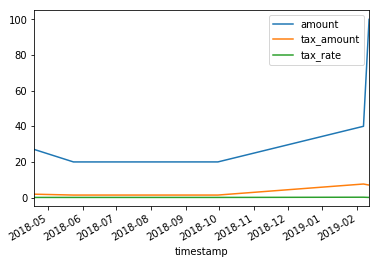

In [163]:
by_timestamp_clean.plot()

In [167]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,1.3993,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622,1.4000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000,0.19
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07


In [168]:
bank.accounts

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


In [195]:
bank.accounts.loc[:, ['id', 'firstname']]

,id,firstname
0,1,Dalia
1,2,Matthias
2,3,Manuel


In [199]:
transactions_without_id = bank.transactions.drop(columns=['id'])
account_id_and_firstname = bank.accounts.loc[:, ['id', 'firstname']]
merged_acc_trans = transactions_without_id.merge(account_id_and_firstname, left_on= 'sender_id', right_on='id', suffixes=('_transaction', '_account'))
merged_acc_trans

,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,id,firstname
0,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07,1,Dalia
1,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,1.3993,0.07,1,Dalia
2,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07,1,Dalia
3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622,1.4000,0.07,3,Manuel
4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000,0.19,2,Matthias


In [181]:
merged_acc_trans.sort_values('id_x')

,id_x,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,id_y,firstname,lastname,balance
2,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 14:53:20.749495,7.0000,0.07,1,Dalia,Das,0.0
0,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-18 14:53:21.516607,1.8893,0.07,1,Dalia,Das,0.0
1,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-05-23 14:53:21.516618,1.3993,0.07,1,Dalia,Das,0.0
3,3,3,1,20.00,Mittagessen,Essen,2018-09-29 14:53:21.516622,1.4000,0.07,3,Manuel,Wiedenmann,0.0
4,4,2,3,40.00,Drinks,Lifestyle,2019-02-06 14:53:21.516625,7.6000,0.19,2,Matthias,Rettenmeier,0.0


In [ ]:
merged_acc_trans = pdbank.transactions.merge(bank.accounts, left_on= 'sender_id', right_on='id')
merged_acc_trans

In [ ]:
df = pd.merge(df,df2[['Key_Column','Target_Column']],on='Key_Column', how='left')